# K-Means! From Scratch.

### Theory

> source: https://en.wikipedia.org/wiki/K-means_clustering

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. 

## Imports

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

## Functions & Classes

In [2]:
def distribution_generation(x_factor=1, y_factor=1, label=0, nb=1000):
    """
    Generates 100 observations of a random distribution.
    """
    coords = [(rd.random(), rd.random(), label) for _ in range(nb)]
    coords = np.array(coords)
    coords[:,0] *= x_factor
    coords[:,1] *= y_factor
    return coords

In [3]:
class k_means():
    def __init__(self, k=2, maximum_iterations = 300, nb=1000):
        """
        Initializes the k-means class
        based on code available here: 
        > https://pythonprogramming.net/k-means-from-scratch-2-machine-learning-tutorial
        """
        self.k = k
        self.nb = nb
        self.maximum_iterations = maximum_iterations
        self.centroids = {}
        self.optimized = True

    def fit(self, data):
        """
        Fits the data to the number of centroids.
        """
        # Selects a starting centroid
        for i in range(self.k):
            self.centroids[i] = data[self.nb*i][:2]
        # Iterates a predetermined number of times, unless optimization condition is met
        for i in range(self.maximum_iterations):
            print(f"Epoch {i}")
            # Creates k buckets where data points are going to be classified during the iteration
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []
            # for each data point in the data
            for data_point in data:
                # Step 1. Calculates the euclidian distance between the data point and each centroid
                distances = [np.linalg.norm(data_point[:2] - self.centroids[centroid]) for centroid in self.centroids]
                # Step 2. Retrieves the index of the shortest euclidian distance
                classification = distances.index(min(distances))
                # Step 3. Records the data_point in the respective bucket of the closest centroid
                self.classifications[classification].append(data_point[:2])
            
            # Records the set of centroids used during the iteration
            prev_centroids = dict(self.centroids)

            # Replaces each centroids with the average of the classification achieved around them
            # during the iteration
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            
            # Initializes the optimized variable to be tested
            self.optimized = True
            
            # We compute the difference between the current and previous centroids until we reach a 
            # specific satisfactory threshold (unless we exit the function because we reach max iterations)
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                #print(original_centroid, current_centroid, np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > 0.0001:
                    print(f"Optimizer for centroid {c}: "+\
                          f"{np.sum((current_centroid-original_centroid)/original_centroid*100.0)}")
                    self.optimized = False

            if self.optimized:
                print("Fitted")
                break

    def predict_single(self,data):
        distances = [np.linalg.norm(data[:2]-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    def predict(self,data):
        self.predictions = {}
        for i in range(self.k):
            self.predictions[i] = []
        for data_point in data:
            classification = self.predict_single(data_point)
            self.predictions[classification].append(data_point)

## Implementing

In [4]:
nb = 100

distribution_1 = distribution_generation(1,1, 0, nb)
distribution_2 = distribution_generation(1,1, 1, nb)
distribution_3 = distribution_generation(1,1, 2, nb)

full_distribution = np.concatenate((distribution_1, distribution_2, distribution_3))

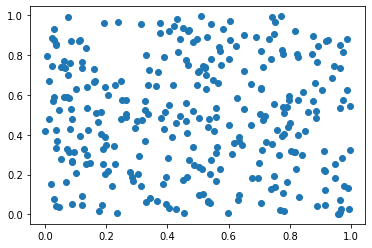

In [5]:
plt.scatter(full_distribution[:,0],full_distribution[:,1])

In [6]:
clf = k_means(3, 300, nb)
clf.fit(full_distribution)

Epoch 0
Optimizer for centroid 1: 171.49147409294204
Optimizer for centroid 2: 134.64343485529673
Epoch 1
Optimizer for centroid 0: 9.90720977315662
Optimizer for centroid 1: 14.135355200462268
Optimizer for centroid 2: 10.531976789715221
Epoch 2
Optimizer for centroid 0: 9.35517828558379
Optimizer for centroid 1: 3.716342999520829
Optimizer for centroid 2: 0.4800616000573408
Epoch 3
Optimizer for centroid 0: 6.846086126593481
Optimizer for centroid 1: 1.7097550136471487
Optimizer for centroid 2: 0.20846597865107852
Epoch 4
Optimizer for centroid 0: 4.548043233799014
Optimizer for centroid 1: 3.2272178719994593
Optimizer for centroid 2: 0.294603737354002
Epoch 5
Optimizer for centroid 0: 1.483925694415142
Optimizer for centroid 1: 2.845098632024016
Epoch 6
Optimizer for centroid 0: 2.508847944508647
Optimizer for centroid 1: 3.232282256108944
Epoch 7
Optimizer for centroid 0: 1.3428378229768694
Optimizer for centroid 1: 3.7605060135428094
Epoch 8
Optimizer for centroid 0: 1.21232332054

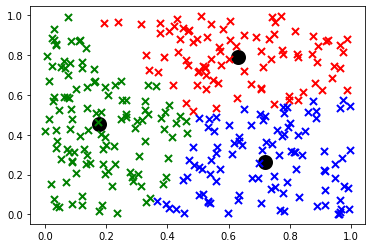

In [7]:
colors = ["g","r","b"]

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=100, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color=color, s=50, linewidths=2)
        
plt.show()

## Testing

In [12]:
dt = distribution_generation(2,2,0,2000)

In [13]:
pred = clf.predict(dt)

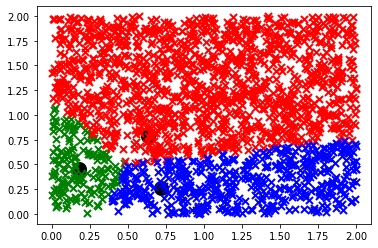

In [14]:
colors = ["g","r","b"]

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=100, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for data_point in clf.predictions[classification]:
        plt.scatter(data_point[0], data_point[1], marker='x', color=color, s=50, linewidths=2)
        
plt.show()